In [6]:
import json
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("yelp_ml_master.csv")

In [7]:
# Filter the data to include only rows where the 'Categories' column contains the substring 'Restaurants'
restaurant_data = data[data['categories'].str.contains('Restaurants', na=False)]

# Print the number of data points that contain 'Restaurants' in their 'Categories'
print(len(restaurant_data))

52268


In [12]:
import numpy as np
category_counts

Restaurants                  52268
Food                         15472
Nightlife                     8723
Sandwiches                    8366
Bars                          8337
                             ...  
Home Theatre Installation        1
Homeowner Association            1
Kids Hair Salons                 1
Calabrian                        1
Gemstones & Minerals             1
Name: count, Length: 728, dtype: int64

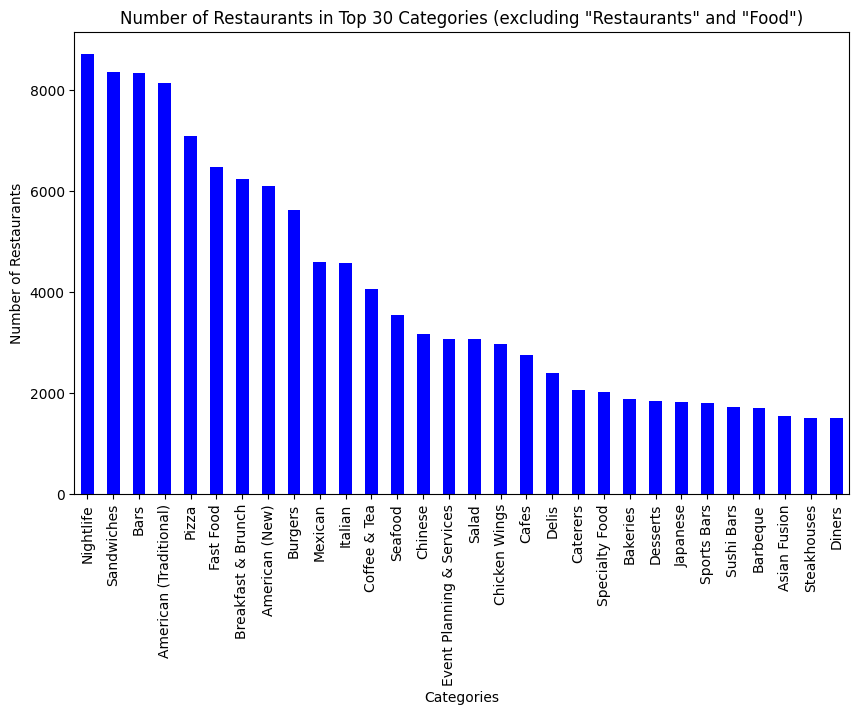

Restaurants                  52268
Food                         15472
Nightlife                     8723
Sandwiches                    8366
Bars                          8337
                             ...  
Home Theatre Installation        1
Homeowner Association            1
Kids Hair Salons                 1
Calabrian                        1
Gemstones & Minerals             1
Name: count, Length: 728, dtype: int64


In [8]:
# Split the 'categories' column into individual categories
all_words = restaurant_data['categories'].str.split(', ', expand=True).stack()

# Count the occurrences of each category
category_counts = all_words.value_counts()

# Select the top 30 categories
top_30_categories = category_counts.head(32)  # Select 32 categories to account for the removal of "Restaurants" and "Food"

# Remove the categories "Restaurants" and "Food" from top_30_categories
top_30_categories = top_30_categories.drop(labels=['Restaurants', 'Food'])

# Create a bar plot to visualize the count of restaurants in the top 30 categories (excluding "Restaurants" and "Food")
plt.figure(figsize=(10, 6))
top_30_categories.plot(kind='bar', color='blue')

# Set the title and labels
plt.title('Number of Restaurants in Top 30 Categories (excluding "Restaurants" and "Food")')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')

# Rotate x labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

print(category_counts)

In [ ]:
# Explode the 'categories' column into individual categories
exploded_data = restaurant_data.assign(categories=restaurant_data['categories'].str.split(', ')).explode('categories')

# Remove the categories "Restaurants" and "Food"
filtered_data = exploded_data[~exploded_data['categories'].isin(['Restaurants', 'Food'])]

# Filter the data to include only the top 30 categories
top_30_data = filtered_data[filtered_data['categories'].isin(top_30_categories)]

# Count the occurrences of each category and select the top 30 categories
category_counts = filtered_data['categories'].value_counts().head(30)

# Filter the data to include only the top 30 categories
top_30_data = filtered_data[filtered_data['categories'].isin(category_counts.index)]

# Group the data by category and calculate the average rating for each category
average_ratings = top_30_data.groupby('categories')['stars'].mean()

# Merge the average ratings data with the category counts data
merged_data = pd.merge(average_ratings, category_counts, left_index=True, right_index=True)

# Sort the merged data by the category counts
sorted_data = merged_data.sort_values(by='categories', ascending=False)

print(category_counts)
